###Parte 1

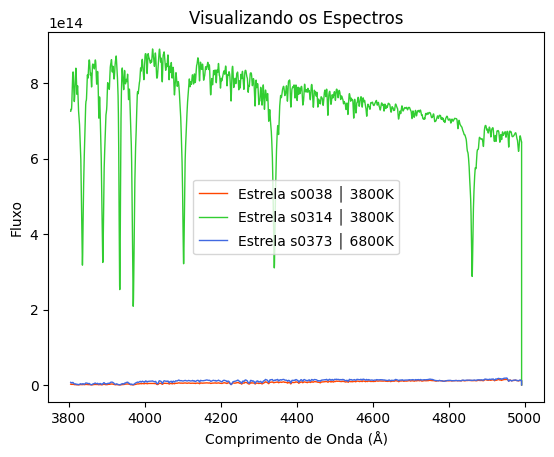

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Dados do primeiro espectro
wavelengths1, intensities1 = np.loadtxt('s0038.spec.nulbad.2.500', unpack=True)

# Dados do segundo espectro
wavelengths2, intensities2 = np.loadtxt("s0314.spec.nulbad.2.500", unpack=True)

# Dados do terceiro espectro
wavelengths3, intensities3 = np.loadtxt("s0373.spec.nulbad.2.500", unpack=True)

plt.plot(wavelengths1, intensities1, label="Estrela s0038 │ 3800K", color='orangered', linewidth=1)
plt.plot(wavelengths2, intensities2, label="Estrela s0314 │ 3800K", color='limegreen', linewidth=1)
plt.plot(wavelengths3, intensities3, label="Estrela s0373 │ 6800K", color='royalblue', linewidth=1)

plt.xlabel("Comprimento de Onda (Å)")
plt.ylabel('Fluxo')
plt.title('Visualizando os Espectros')

plt.legend()
plt.show()

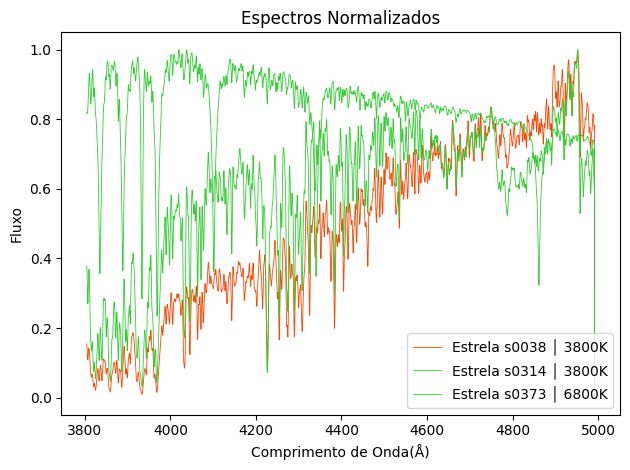

In [13]:
# NORMALIZADO
# Dados do primeiro espectro
wavelengths1, intensities1 = np.loadtxt("s0038.spec.nulbad.2.500", unpack=True)

# Dados do segundo espectro
wavelengths2, intensities2 = np.loadtxt("s0314.spec.nulbad.2.500", unpack=True)

# Dados do terceiro espectro
wavelengths3, intensities3 = np.loadtxt("s0373.spec.nulbad.2.500", unpack=True)

%matplotlib inline

# Normalização dos espectros
max_intensity1 = np.max(intensities1)
max_intensity2 = np.max(intensities2)
max_intensity3 = np.max(intensities3)

normalized_intensities1 = intensities1 / max_intensity1
normalized_intensities2 = intensities2 / max_intensity2
normalized_intensities3 = intensities3 / max_intensity3

plt.plot(wavelengths1, normalized_intensities1, label="Estrela s0038 │ 3800K", color='orangered', linewidth=0.6)
plt.plot(wavelengths2, normalized_intensities2, label="Estrela s0314 │ 3800K", color='limegreen', linewidth=0.6)
plt.plot(wavelengths3, normalized_intensities3, label="Estrela s0373 │ 6800K", color='limegreen', linewidth=0.6)


plt.xlabel("Comprimento de Onda(Å)")
plt.ylabel('Fluxo')
plt.title('Espectros Normalizados')

plt.legend()
plt.tight_layout()
plt.show()

## PARTE 2

2.2. Visualizando os espectros


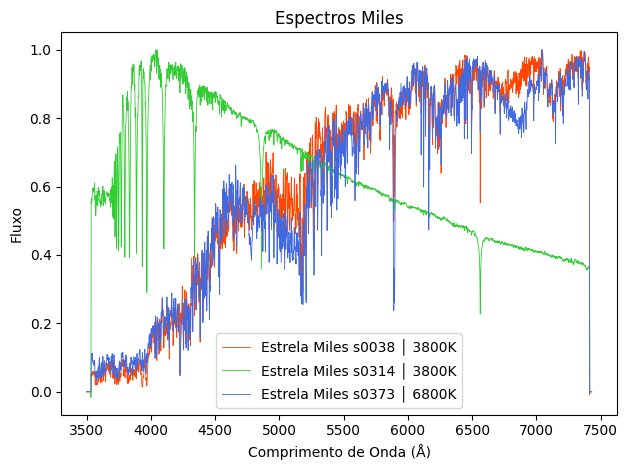

In [14]:
# NORMALIZADO MILES
# Dados do primeiro espectro
wavelengths1, intensities1 = np.loadtxt("s0038_miles", unpack=True)

# Dados do segundo espectro
wavelengths2, intensities2 = np.loadtxt("s0314_miles", unpack=True)

# Dados do terceiro espectro
wavelengths3, intensities3 = np.loadtxt("s0373_miles", unpack=True)

# Normalização dos espectros
max_intensity1 = np.max(intensities1)
max_intensity2 = np.max(intensities2)
max_intensity3 = np.max(intensities3)

normalized_intensities1 = intensities1 / max_intensity1
normalized_intensities2 = intensities2 / max_intensity2
normalized_intensities3 = intensities3 / max_intensity3

plt.plot(wavelengths1, normalized_intensities1, label="Estrela Miles s0038 │ 3800K", color='orangered', linewidth=0.6)
plt.plot(wavelengths2, normalized_intensities2, label="Estrela Miles s0314 │ 3800K", color='limegreen', linewidth=0.6)
plt.plot(wavelengths3, normalized_intensities3, label="Estrela Miles s0373 │ 6800K", color='royalblue', linewidth=0.6)

%matplotlib inline

plt.xlabel("Comprimento de Onda (Å)")
plt.ylabel('Fluxo')
plt.title('Espectros Miles')

plt.legend()
plt.tight_layout()
plt.show()

2.3. Linhas de hidrôgenio, atômicas e moleculares em estrelas de diferentes tipos
espectrais

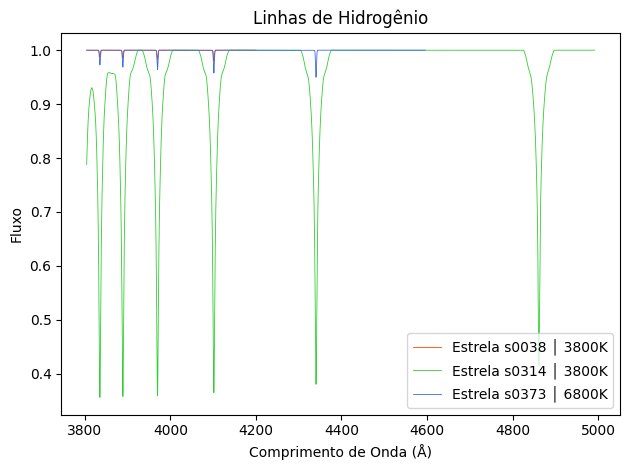

In [38]:
# Dados dos espectros normalizados
wavelengths1, intensities1 = np.loadtxt("s0038_hydro.norm.nulbad.2.500", unpack=True)
wavelengths2, intensities2 = np.loadtxt("s0314_hydro.norm.nulbad.2.500", unpack=True)
wavelengths3 = []
intensities3 = []

with open("s0373_hydro.norm.nulbad.2.500", "r") as file:
    for line in file:
        columns = line.strip().split()
        if len(columns) == 2:  # Garantir que haja duas colunas para comprimento de onda e intensidade
            wavelengths3.append(float(columns[0]))
            intensities3.append(float(columns[1]))

wavelengths3 = np.array(wavelengths3)
intensities3 = np.array(intensities3)

# Comprimentos de onda das linhas de hidrogênio
hydrogen_wavelengths = [6563, 4861, 4340]  # Exemplos de linhas H-alpha, H-beta e H-gamma

# Cálculo das linhas de hidrogênio para cada espectro
hydrogen_lines1 = calculate_hydrogen_lines(wavelengths1, intensities1, hydrogen_wavelengths)
hydrogen_lines2 = calculate_hydrogen_lines(wavelengths2, intensities2, hydrogen_wavelengths)
hydrogen_lines3 = calculate_hydrogen_lines(wavelengths3, intensities3, hydrogen_wavelengths)

# Plotagem dos espectros com linhas de hidrogênio
plt.plot(wavelengths1, intensities1,label="Estrela s0038 │ 3800K", color='orangered', linewidth=0.6)
plt.plot(wavelengths2, intensities2, label="Estrela s0314 │ 3800K", color='limegreen', linewidth=0.6)
plt.plot(wavelengths3, intensities3, label="Estrela s0373 │ 6800K", color='royalblue', linewidth=0.6)


plt.xlabel("Comprimento de Onda (Å)")
plt.ylabel('Fluxo')
plt.title('Linhas de Hidrogênio')

%matplotlib inline
plt.legend()
plt.tight_layout()
plt.show()

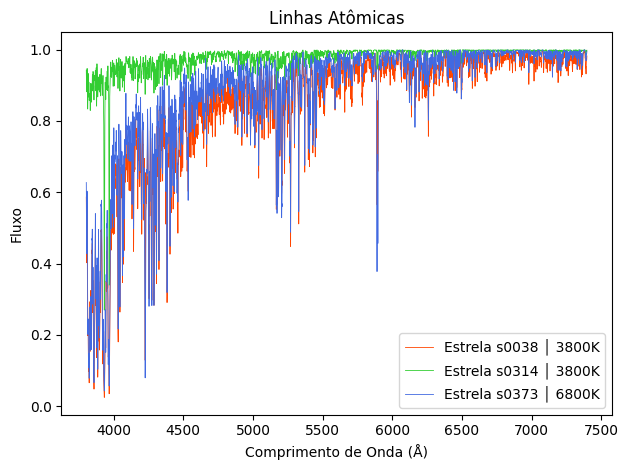

In [ ]:
# Dados dos espectros normalizados
wavelengths1, intensities1 = np.loadtxt("s0038_atoms.norm.nulbad.2.500", unpack=True)
wavelengths2, intensities2 = np.loadtxt("s0314_atoms.norm.nulbad.2.500", unpack=True)
wavelengths3, intensities3 = np.loadtxt("s0373_atoms.norm.nulbad.2.500", unpack=True)

# Função para calcular linhas atômicas
def calculate_atomic_lines(wavelengths, intensities, atomic_wavelengths):
    atomic_lines = []
    for wavelength in atomic_wavelengths:
        index = np.argmin(np.abs(wavelengths - wavelength))
        atomic_lines.append((wavelengths[index], intensities[index]))
    return atomic_lines

# Comprimentos de onda das linhas atômicas (exemplo)
atomic_wavelengths = [5890, 5896, 6563, 4861]  # Exemplos de linhas de sódio (Na D) e hidrogênio (H-alpha, H-beta)

# Cálculo das linhas atômicas para cada espectro
atomic_lines1 = calculate_atomic_lines(wavelengths1, intensities1, atomic_wavelengths)
atomic_lines2 = calculate_atomic_lines(wavelengths2, intensities2, atomic_wavelengths)
atomic_lines3 = calculate_atomic_lines(wavelengths3, intensities3, atomic_wavelengths)

# Plotagem dos espectros com linhas atômicas
plt.plot(wavelengths1, intensities1, label="Estrela s0038 │ 3800K", color='orangered', linewidth=0.6)
plt.plot(wavelengths2, intensities2, label="Estrela s0314 │ 3800K", color='limegreen', linewidth=0.6)
plt.plot(wavelengths3, intensities3, label="Estrela s0373 │ 6800K", color='royalblue', linewidth=0.6)


plt.xlabel("Comprimento de Onda (Å)")
plt.ylabel('Fluxo')
plt.title('Linhas Atômicas')

%matplotlib inline
plt.legend()
plt.tight_layout()
plt.show()

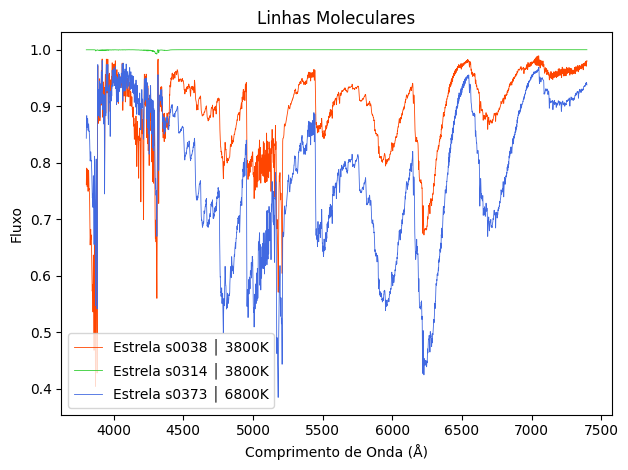

In [ ]:
# Dados dos espectros normalizados
wavelengths1, intensities1 = np.loadtxt("s0038_molec.norm.nulbad.2.500", unpack=True)
wavelengths2, intensities2 = np.loadtxt("s0314_molec.norm.nulbad.2.500", unpack=True)
wavelengths3, intensities3 = np.loadtxt("s0373_molec.norm.nulbad.2.500", unpack=True)

# Função para calcular linhas moleculares (simplificado)
def calculate_molecular_lines(wavelengths, intensities, molecular_band):
    molecular_lines = []
    for i, wavelength in enumerate(wavelengths):
        if molecular_band[0] <= wavelength <= molecular_band[1]:
            molecular_lines.append((wavelengths[i], intensities[i]))
    return molecular_lines

# Banda molecular CO em 2.3 µm (exemplo)
co_band = [2300, 2350]  # Intervalo aproximado para a banda molecular CO

# Cálculo das linhas moleculares para cada espectro
molecular_lines1 = calculate_molecular_lines(wavelengths1, intensities1, co_band)
molecular_lines2 = calculate_molecular_lines(wavelengths2, intensities2, co_band)
molecular_lines3 = calculate_molecular_lines(wavelengths3, intensities3, co_band)

# Plotagem dos espectros com linhas moleculares
plt.plot(wavelengths1, intensities1, label="Estrela s0038 │ 3800K", color='orangered', linewidth=0.6)
plt.plot(wavelengths2, intensities2, label="Estrela s0314 │ 3800K", color='limegreen', linewidth=0.6)
plt.plot(wavelengths3, intensities3, label="Estrela s0373 │ 6800K", color='royalblue', linewidth=0.6)

plt.xlabel("Comprimento de Onda (Å)")
plt.ylabel('Fluxo')
plt.title('Linhas Moleculares')

%matplotlib inline
plt.legend()
plt.tight_layout()
plt.show()